In [1]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.scalar_mediator import ScalarMediator

This function makes nice $\LaTeX$ labels for different final states

In [2]:
def get_tex_label(label):
    tex_label = r"$"+ label
    tex_label = tex_label.replace("pi0", "\pi^0")
    tex_label = tex_label.replace("pi pi", "\pi^+ \pi^-")
    tex_label = tex_label.replace("mu mu", "\mu^+ \mu^-")
    tex_label = tex_label.replace("g", "\gamma")
    tex_label = tex_label.replace("e e", "e^+ e^-")
    tex_label = tex_label.replace("s s", "S S")
    return tex_label + r"$"

## Branching fractions as a function of $g_{S \chi \chi}$ and $g_{Sff}$

First, create an array with 500 logarithmically spaces values of $g_{Sff}/g_{S\chi\chi}$ to scan over:

In [11]:
ratio_min, ratio_max, n_ratios = 1e-1, 1e10, 500
ratios = np.logspace(np.log10(ratio_min), np.log10(ratio_max), n_ratios)

In [12]:
sm_args = {"mx": 250., "ms": 200., "gsxx": 1., "gsff": 1., "gsGG": 0.0000001, "gsFF": 0.}
sm = ScalarMediator(**sm_args)

Now we compute the branching fractions for each value of $g_{Sff} / g_{s\chi\chi}$. To avoid dividing by zero, it's necessary to give the DM a small amount of kinetic energy by setting its velocity equal to the usual $10^{-3}c$. We store the dictionaries returned by `branching_fractions()` in the list `bfs_raw`.

In [13]:
vx_mw = 1.0e-3  # approximate DM velocity in Milky Way halo

bfs_varying_gs = {}

# Compute branching fractions, vev for different couplings
bfs_raw = []
vss = []
for ratio in ratios:
    sm.gsff = sm.gsxx * ratio
    vss.append(sm.vs)
    bfs_raw.append(sm.branching_fractions(2. * sm.mx * (1. + 0.5 * vx_mw)))
    
vss = np.array(vss)

This turns our list of dictionaries of branching fractions into a dictionary of lists of branching fractions:

In [14]:
bfs = {fs: [bf[fs] for bf in bfs_raw] for fs in sm.list_final_states()}

Finally, we iterate over the final states to which $S$ has nonzero couplings and plot their branching fractions.

Text(0,0.5,'$v_S$ (MeV)')

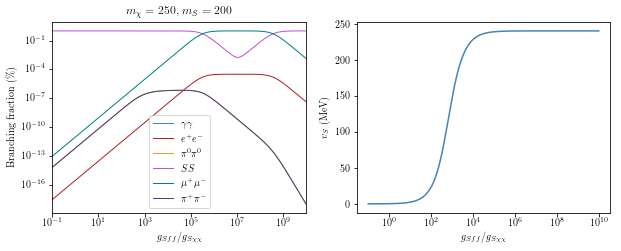

In [15]:
plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)

for fs, bf_list in bfs.iteritems():
    plt.plot(ratios, bf_list, label=get_tex_label(fs), linewidth=1)

plt.xscale("log")
plt.yscale("log")
plt.title(r"$m_\chi = %.0f$, $m_S = %.0f$" % (sm.mx, sm.ms))
plt.xlabel(r"$g_{Sff} / g_{S\chi\chi}$")
plt.ylabel("Branching fraction (\%)")
plt.legend()
plt.xlim(ratios[[0, -1]])

plt.subplot(1, 2, 2)

plt.plot(ratios, vss)
plt.xscale("log")
plt.xlabel(r"$g_{Sff} / g_{S\chi\chi}$")
plt.ylabel(r"$v_S$ (MeV)")

# plt.savefig("figures/scalar_branching_fractions.pdf")

## Branching fractions as a function of $g_{SGG}/g_{Sff}$

Text(0,0.5,'$v_S$ (MeV)')

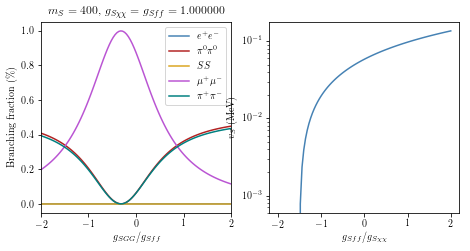

In [9]:
ratio_min, ratio_max, n_ratios = -2, 2, 101
ratios = np.linspace(ratio_min, ratio_max, n_ratios)

sm_args = {"mx": 250., "ms": 400., "gsxx": 1., "gsff": 1., "gsGG": 1., "gsFF": 0.}
sm = ScalarMediator(**sm_args)

vx_mw = 1.0e-3  # approximate DM velocity in Milky Way halo

# Compute branching fractions for different couplings
bfs_raw = []
vss_raw = []
for r in ratios:
    sm.gsGG = r * sm.gsff
    e_cm = 2. * sm.mx * (1. + 0.5 * vx_mw**2)
    bfs_raw.append(sm.branching_fractions(e_cm))
    vss_raw.append(sm.vs)
vss = np.array(vss_raw)
    
bfs = {fs: [bf[fs] for bf in bfs_raw] for fs in sm.list_final_states()}

### Make the plot
plt.figure(figsize=(7.5, 3.5))
plt.subplot(1, 2, 1)

for fs, bf_list in bfs.iteritems():
    if fs != "g g":
        plt.plot(ratios, bf_list, label=get_tex_label(fs))

plt.title("$m_S = %.0f$, $g_{S\chi\chi} = g_{Sff} = %f$" % (sm.ms, sm.gsff))
plt.xlabel(r"$g_{SGG} / g_{Sff}$")
plt.ylabel("Branching fraction (\%)")
plt.legend()
plt.xlim(ratios[[0, -1]])
# plt.ylim(1e-1, 1.1)

plt.subplot(1, 2, 2)

plt.plot(ratios, vss)
plt.yscale("log")
plt.xlabel(r"$g_{Sff} / g_{S\chi\chi}$")
plt.ylabel(r"$v_S$ (MeV)")

# plt.savefig("figures/scalar_branching_fractions.pdf")

## Branching fractions as a function of $m_\chi$

(0, 1.1)

/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


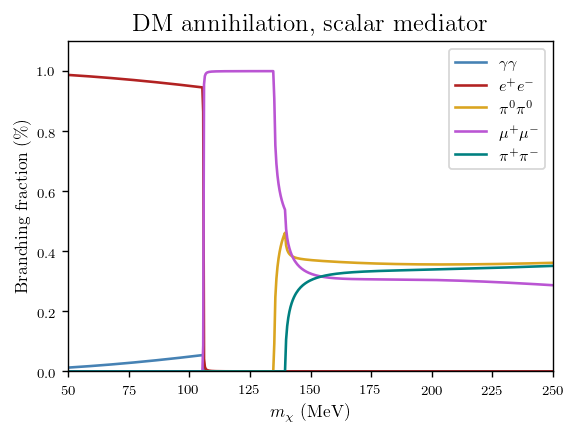

In [3]:
mx_min, mx_max, n_mxs = 50., 250, 500
mxs = np.logspace(np.log10(mx_min), np.log10(mx_max), n_mxs)

sm_args = {"mx": 250., "ms": 1000., "gsxx": 1., "gsff": 1., "gsGG": 1., "gsFF": 1.}
sm = ScalarMediator(**sm_args)

vx_mw = 1.0e-3  # approximate DM velocity in Milky Way halo

bfs_varying_gs = {}

# Compute branching fractions for different couplings
bfs_raw = []
for mx in mxs:
    sm.mx = mx
    e_cm = 2. * sm.mx * (1. + 0.5 * vx_mw**2)
    bfs_raw.append(sm.branching_fractions(e_cm))
    
bfs = {fs: [bf[fs] for bf in bfs_raw] for fs in sm.list_final_states()}

### Make the plot
plt.figure(figsize=(5, 3.5))

for fs, bf_list in bfs.iteritems():
    if fs != "s s":
        plt.plot(mxs, bf_list, label=get_tex_label(fs))

# plt.xscale("log")
# plt.yscale("log")
plt.title("DM annihilation, scalar mediator")
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel("Branching fraction (\%)")
plt.legend()
plt.xlim(mxs[[0, -1]])
plt.ylim(0, 1.1)

# plt.savefig("figures/scalar_branching_fractions_higgs_portal.pdf")

## Branching fractions for mediator decay

(0, 1.1)

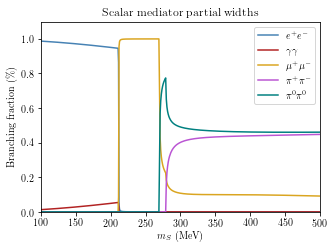

In [8]:
ms_min, ms_max, n_mss = 2*50., 2*250, 500
mss = np.logspace(np.log10(ms_min), np.log10(ms_max), n_mss)

sm_args = {"mx": 500., "ms": 600., "gsxx": 1., "gsff": 1., "gsGG": 1., "gsFF": 1.}
sm = ScalarMediator(**sm_args)

# Compute branching fractions for different couplings
bfs_raw = []
for ms in mss:
    sm.ms = ms
    bfs_raw.append(sm.partial_widths())
    
bfs = {fs: np.array([bf[fs] for bf in bfs_raw]) for fs in ['mu mu', 'e e', 'g g', 'pi0 pi0', 'pi pi', "total"]}
bfs = {fs: widths / bfs["total"] for fs, widths in bfs.iteritems() if fs != "total"}

### Make the plot
plt.figure(figsize=(5, 3.5))

for fs, bf_list in bfs.iteritems():
#     if fs != "s s":
    plt.plot(mss, bf_list, label=get_tex_label(fs))

# plt.xscale("log")
# plt.yscale("log")
plt.title("Scalar mediator partial widths")
plt.xlabel(r"$m_S$ (MeV)")
plt.ylabel(r"Branching fraction (\%)")
plt.legend()
plt.xlim(mss[[0, -1]])
# plt.yscale("log")
plt.ylim(0, 1.1)

# plt.savefig("figures/scalar_branching_fractions_higgs_portal.pdf")